In [1]:
from earthData import *
# by default, the function will use the current date. Iterate backwards by 1 day to get previous day's data. 
start_date_ = dt.date.today() - dt.timedelta(days = 1)
# start_date_ = dt.date.today() 
end_date_ = dt.date.today()
# obtain current time in format '%Y-%m-%dT%H:%M:%SZ'
end_time_ = dt.datetime.now().strftime('%H:%M:%S')
# obtain start time 12h before end time
start_time_ = (dt.datetime.now() - dt.timedelta(hours = 4)).strftime('%H:%M:%S')   
sea_surface_temperature(start_date=f"{start_date_}", start_time=start_time_, end_date=f"{end_date_}", end_time=f"{end_time_}",bounding_box=(-45, -45, 45, 45))

/Users/sbhardwa/opt/miniconda3/envs/earthaccess/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


EARTHDATA_USERNAME and EARTHDATA_PASSWORD are not set in the current environment, try setting them or use a different strategy (netrc, interactive)
You're now authenticated with NASA Earthdata Login
Using token with expiration date: 11/12/2023
Using .netrc file for EDL
Start date 2023-09-13
End date 2023-09-14
Start time 08:42:29
End time 12:42:29
Latitude and longitude selection (-45, -45, 45, 45)
Granules found: 63
 Getting 1 granules, approx download size: 0.03 GB


QUEUEING TASKS | : 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 260.02it/s]
PROCESSING TASKS | :   0%|                                                                                                                                                                                            | 0/1 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [19]:
# open 2023 dataset for SST 
ds = xr.open_dataset('local_folder/20230912221001-JPL-L2P_GHRSST-SSTskin-MODIS_A-N-v02.0-fv01.0.nc') 

# masked arrays using numpy to remove NAN values from lat, lon, sst 

In [23]:
import numpy.ma as ma

# np arrays 
lat = np.array(ds.lat) 
lon = np.array(ds.lon) 
sst = np.array(ds.sea_surface_temperature[0]) 

# masked arrays 
lat_m = ma.array(ds.lat,mask=np.isnan(ds.lat))
lon_m = ma.array(ds.lon,mask=np.isnan(ds.lon))
sst_m = ma.array( ds.sea_surface_temperature[0] ,mask=np.isnan( ds.sea_surface_temperature[0]))

# plt.contourf(lat_m, lon_m, sst_m) 
# ds.sea_surface_temperature[0].plot() 

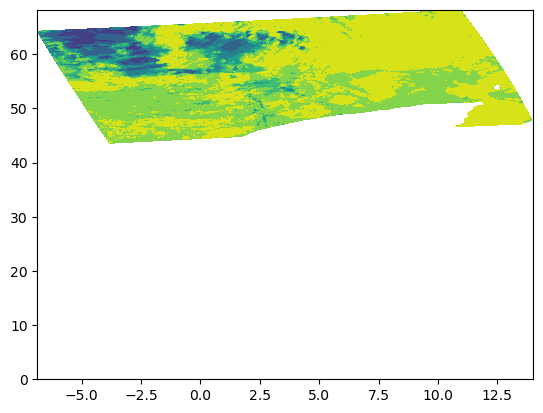

In [38]:
# built in np function replaces nan with 0s and print contour function 
lat_cleaned = np.nan_to_num(lat) 
lon_cleaned = np.nan_to_num(lon) 
plt.contourf(lat_cleaned, lon_cleaned, sst) 

In [47]:
# Remove rows with Nan values.

# Use np.isnan() to create a mask for rows containing NaN values for latitude 
nan_lat_mask = np.any(np.isnan(lat), axis=1)

# Use np.isnan() to create a mask for rows containing NaN values for longitude
nan_lon_mask = np.any(np.isnan(lon), axis=1)

# Obtain the combination of these masks to exclude Nan values for both longitude and latitude 
combined_mask = np.logical_and(nan_lat_mask, nan_lon_mask)

In [48]:
# Use boolean indexing to exclude rows with NaN values for all arrays 
lon_cleaned = lon[~combined_mask]
lat_cleaned = lat[~combined_mask]
sst_cleaned = sst[~combined_mask] 

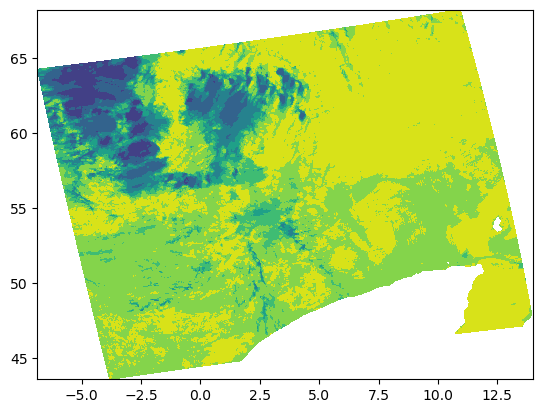

In [49]:
plt.contourf(lat_cleaned, lon_cleaned, sst_cleaned) 

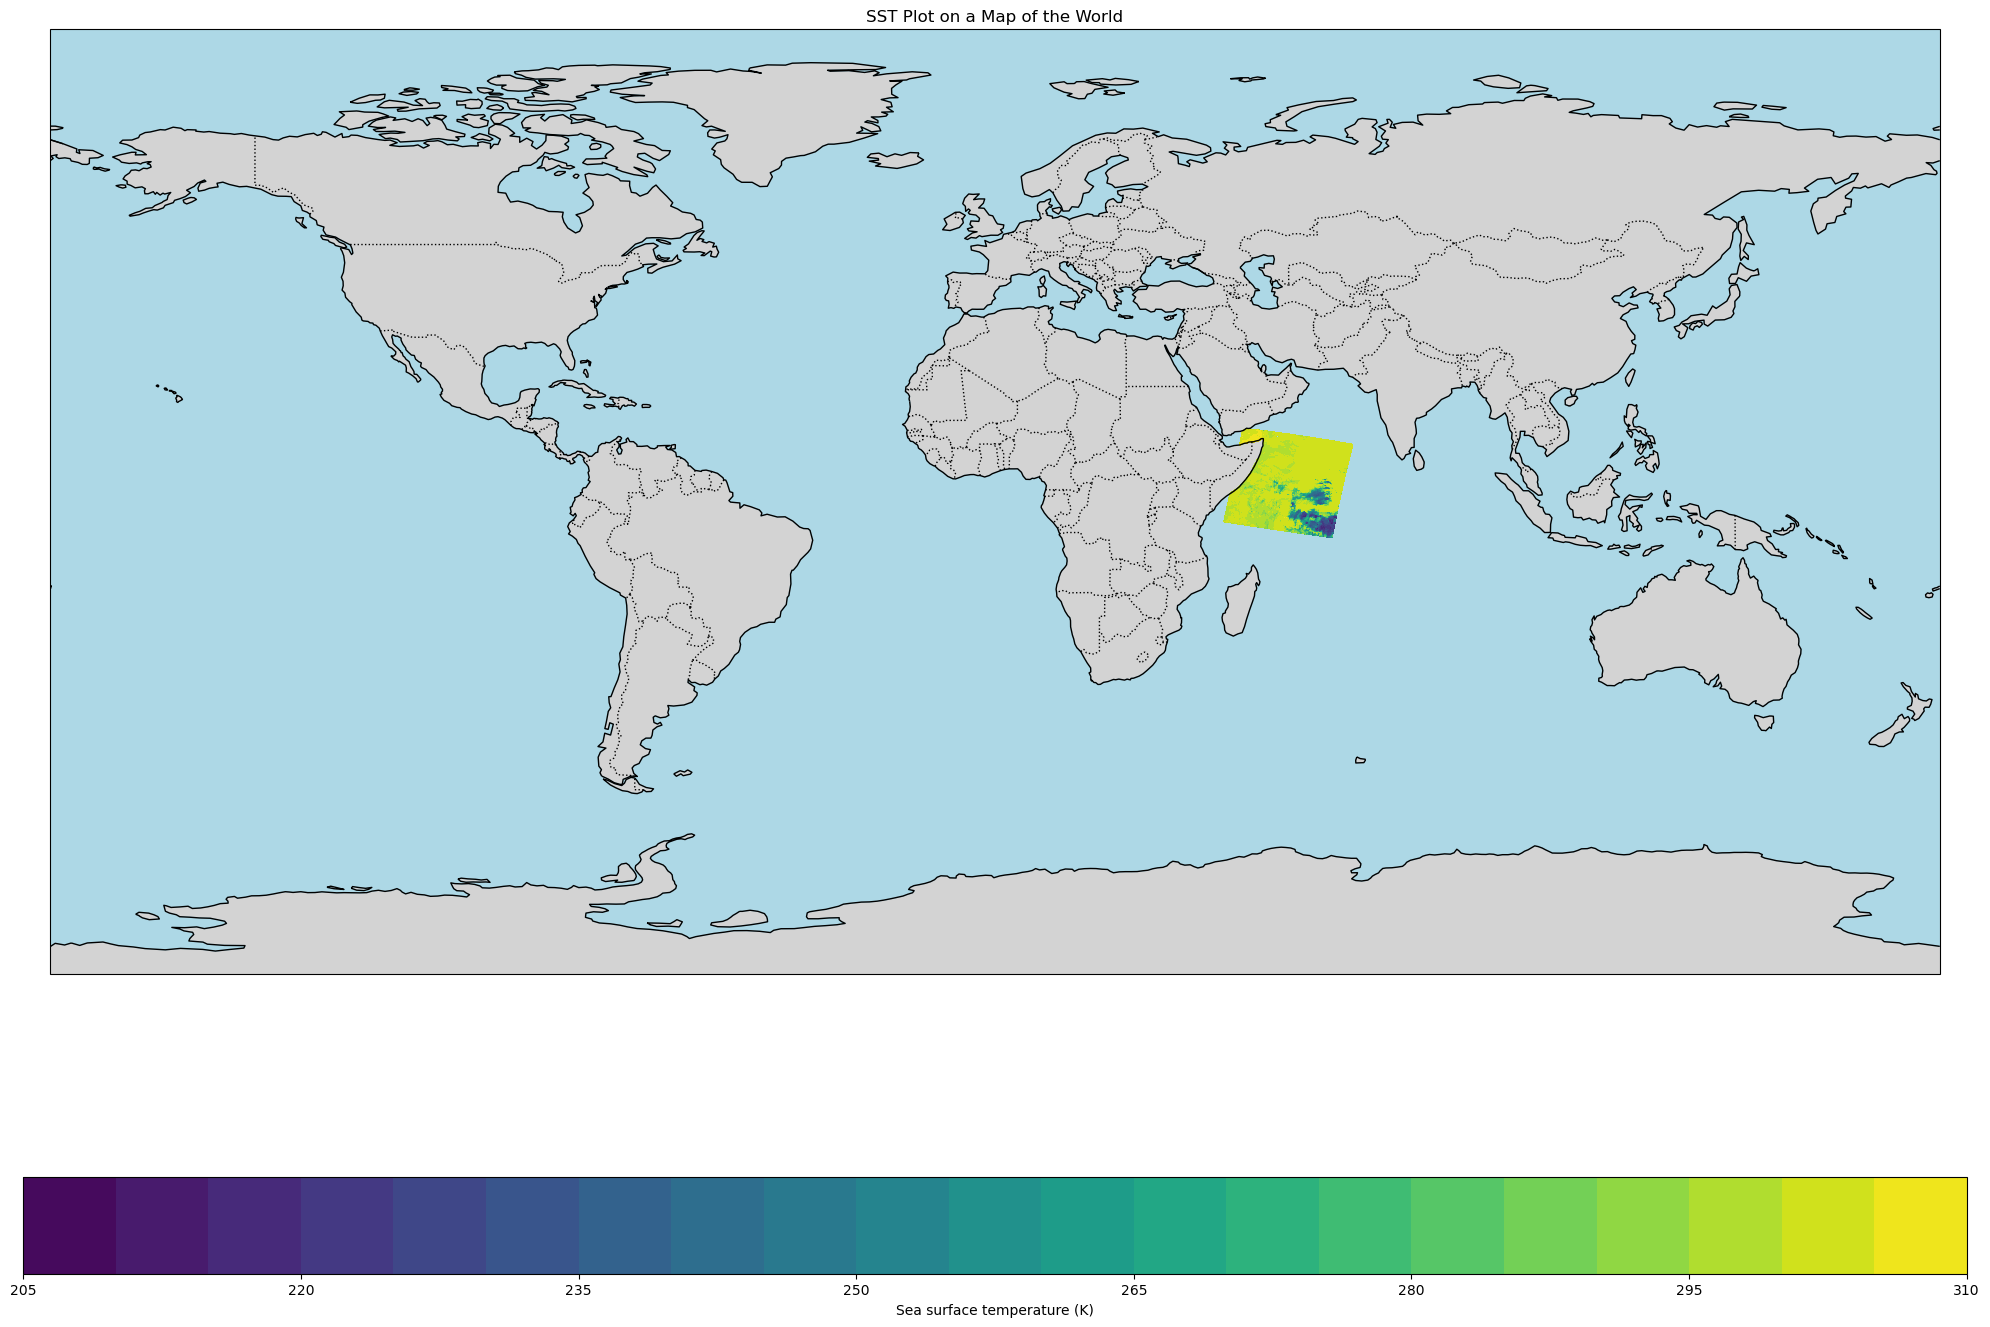

In [55]:
# plot map of the world using cartopy 

import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(figsize=(20,14), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_global()

# Add coastline and country borders for context
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')

# Create a filled contour plot
contour = ax.contourf(lon_cleaned, lat_cleaned, sst_cleaned, levels=20, cmap='viridis')

# Add colorbar
cbar = plt.colorbar(contour, ax=ax, orientation='horizontal')
cbar.set_label("Sea surface temperature (K)")

# Set a title
plt.title("SST Plot on a Map of the World")

fig.tight_layout() 
# Show the plot
plt.show()